<a href="https://colab.research.google.com/github/MohanaRC/Backup/blob/master/Simple_pytesseract_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement :**

You are given 7 by 7 matrix of images in which each image has a number less than 100 written in a green, blue or red background.
Using OCR and other computer vision techniques find sum of no.s in images with green background.
Please make any assumptions required.

**Assumptions**

- For the demo, I arbitary sized images available online have been considered and their paths are saved in a text file
- The image urls are appended in a 7x7 list and the images are being read from the list. The steps of reading images will be reduced if images are appended directly to the list instead of urls, but the remanining steps are the same
- All numbers are assumed to in white
- The problem does not involve recognising handwriting, captcha etc


**Suggested solution**

OCR Libraries available in Python can be used directly in cases

For OCR, I am going to use PyTesseract library. 


**Main Libraries used**

- PyTesseract for OCR
- OpenCV for image handling 
- Matplotlib for display

In [0]:
#### Importing libraries 

import io
import pytesseract
from PIL import Image, ImageFilter, ImageEnhance
import cv2
import matplotlib.pyplot as plt
import urllib
import numpy as np

%matplotlib inline
#For loading files from drive only
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#### The url paths have been saved in the text file digit_image_paths.txt . The file is read, interated over and the images are saved as elements of a 7*7 list. 
#### THESE FUNCTIONS ARE ONLY TO CONVERT DATA IN THE REQUIRED FORMAT

def convert_url_to_image(link):
    '''Function to download the images from the link and return the image as a numpy array'''
    resp = urllib.request.urlopen(link)
    image = np.asarray(bytearray(resp.read()),dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image


def create_image_matrix(file_path):
    '''Function to read urls from text files, fetch images from urls and and append them in a 7*7 list format and return the list to the user'''
    file_obj = open(file_path, "r")
    image_list=[]
    for x in file_obj:
        ### Fetch images from the link
        image=convert_url_to_image(x)
        image_list.append(image)
    list_images=np.array(image_list).reshape(7,7)
    return list_images
      

 
list_images=create_image_matrix("/content/drive/My Drive/Colab Notebooks/digit_image_paths.txt")

Displaying two random images and shape of the array where the images are stored

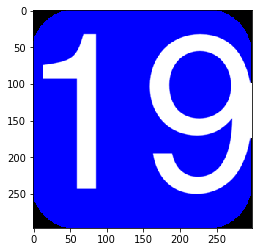

In [0]:
plt.imshow(list_images[0][3])


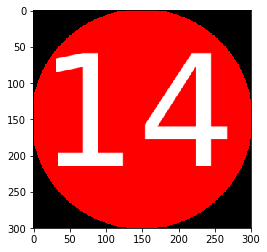

In [0]:
plt.imshow(list_images[0][6])

In [0]:
list_images.shape

(7, 7)

In [0]:
#### Defining limits for green images
lower_green = np.array([40,100,100])
upper_green = np.array([100,255,255])

def find_green(image):
    ## Changing colorspaces for more robust color detection
    im2=cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(im2, lower_green, upper_green)
    ### The masking within range gives lower values for non green backgrounds and higher values for green background. Assuming 50 here
    if np.mean(mask)>50:
        return 1
    else:
        return 0

     
    
def OCR_function(list_images):
    list_images.flatten()
    ### Loop through the images
    sum_green=0
    for i in range(list_images.shape[0]-1):
        for j in range(list_images.shape[1]-1):
            im1=list_images[i][j]
            green_flag=find_green(im1)
            if green_flag==1:
                ### Note the image border cropping is explicitly for our case since all the images come with approximately 25 sized black boundary which interferes with the segmentation process
                imagetext = pytesseract.image_to_string(im1[25:im1.shape[0]-25,25:im1.shape[1]-25 ], config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
                num_text=int(imagetext)
                sum_green=sum_green+num_text
    return sum_green
                
            

sum_green=OCR_function(list_images)
print ("Sum of numbers in green backgrounds are :", sum_green)


Sum of numbers in green backgrounds are : 60
